### Cycle index VS Discharge capacity

In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def plot_max_discharge_capacity(directory):
    # Lister tous les fichiers CSV dans le répertoire donné
    csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

    # Créer une figure pour le graphique
    plt.figure(figsize=(12, 6))  # Augmenter la largeur de la figure

    # #Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        df = pd.read_csv(file_path)

        # Calculer le maximum de Discharge Capacity par Cycle_Index
        max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

        # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
        plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)

    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title('Maximum Discharge Capacity vs Cycle Index')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    plt.show()





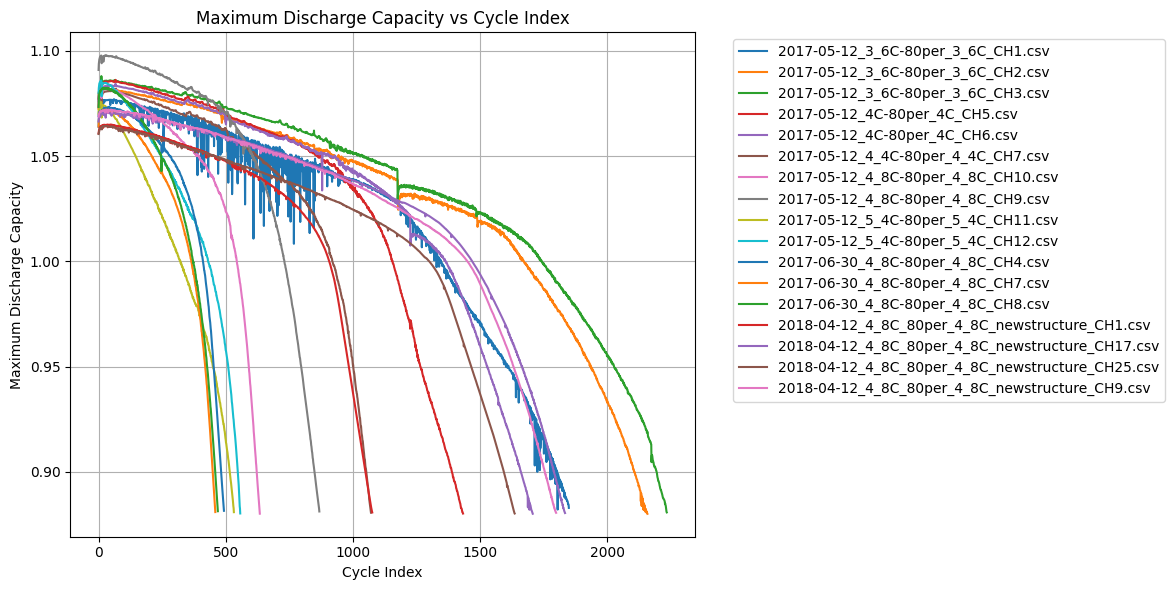

In [22]:

# Exemple d'utilisation
directory = r'C:\Users\pc\Desktop\data\all batchs'  # Utilisation de r pour les chemins Windows
plot_max_discharge_capacity(directory)

2017-05-12_3_6C-80per_3_6C_CH1.csv
0


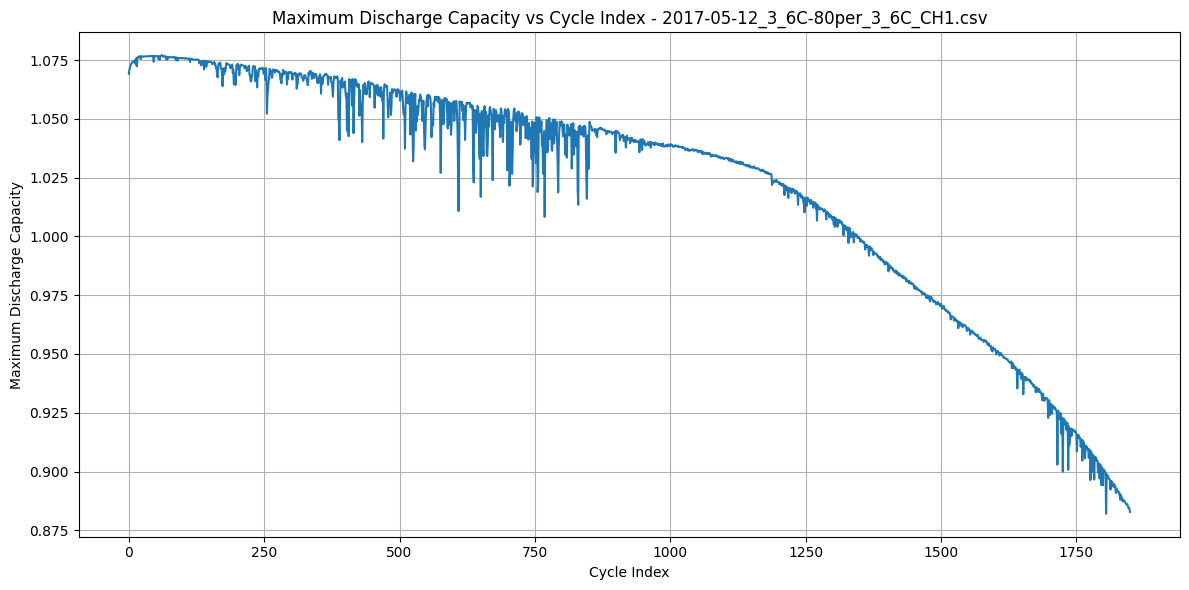

2017-05-12_3_6C-80per_3_6C_CH2.csv
1


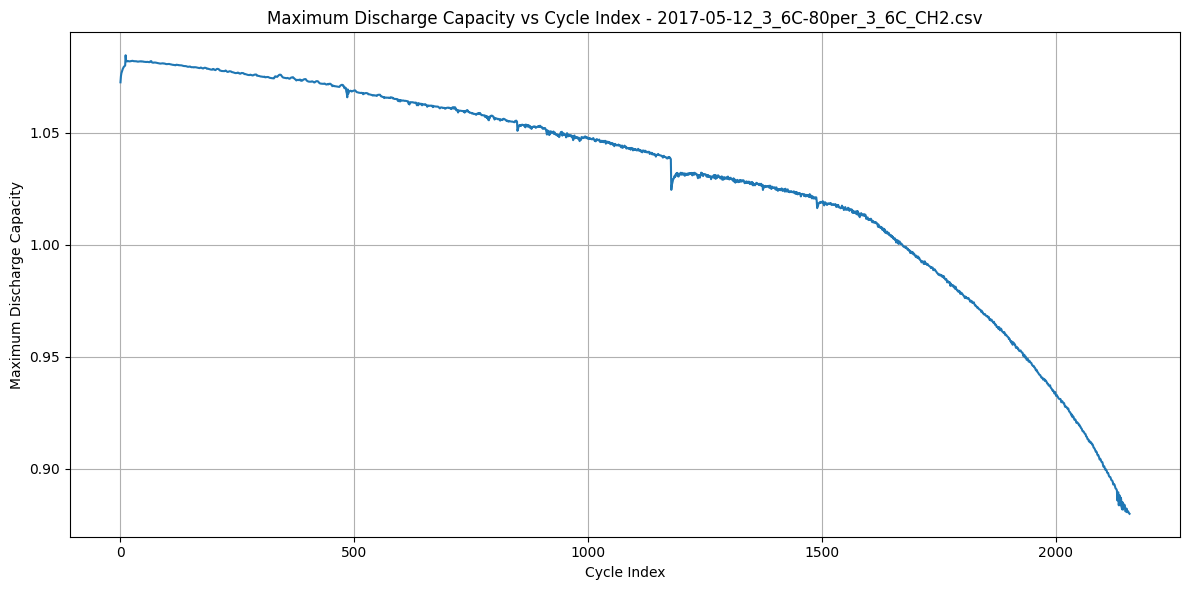

2017-05-12_3_6C-80per_3_6C_CH3.csv
2


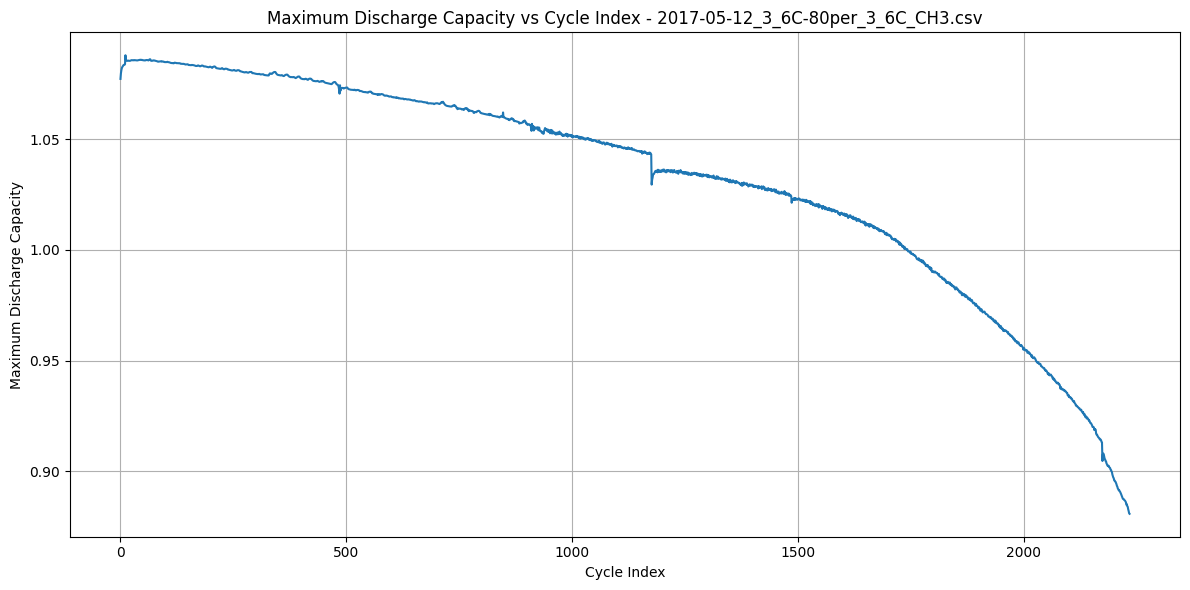

2017-05-12_4C-80per_4C_CH5.csv
3


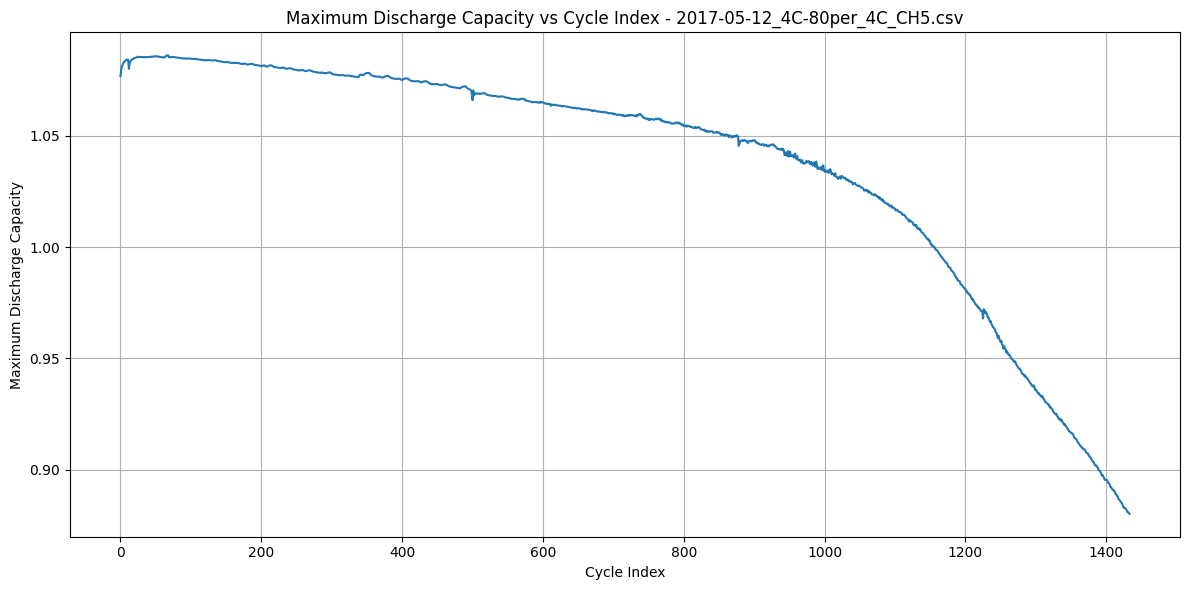

2017-05-12_4C-80per_4C_CH6.csv
4


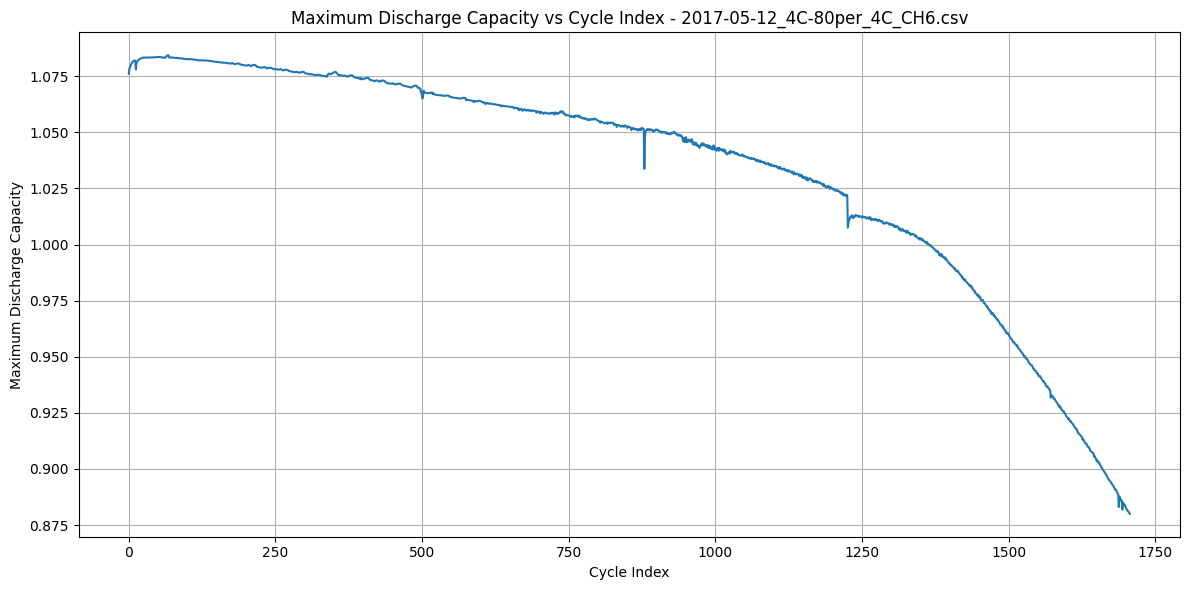

2017-05-12_4_4C-80per_4_4C_CH7.csv
5


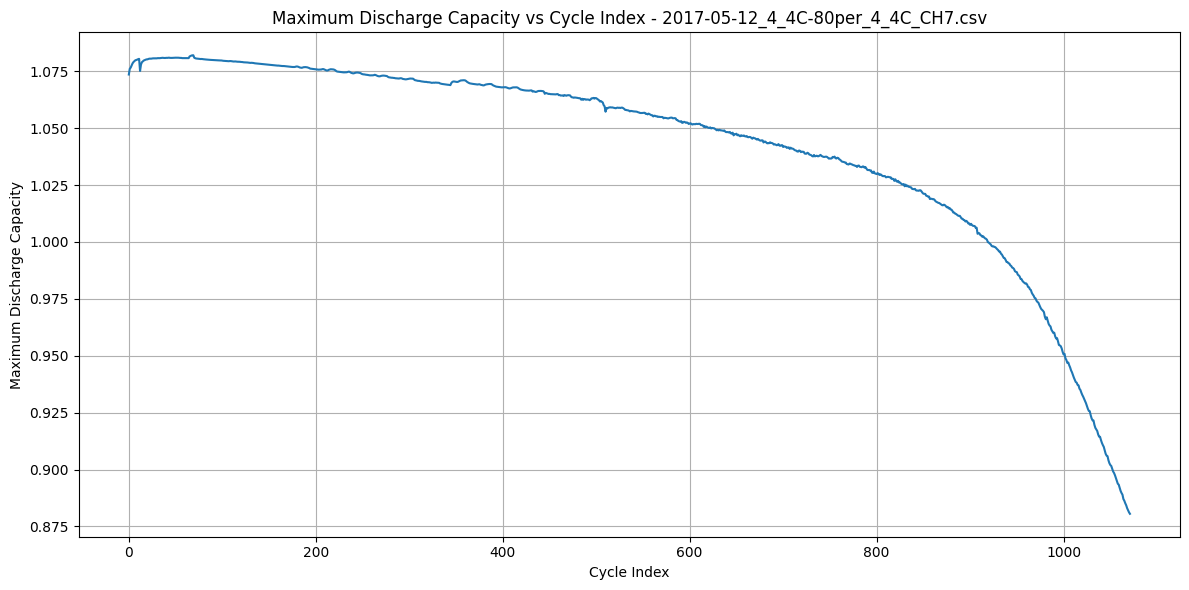

2017-05-12_4_8C-80per_4_8C_CH10.csv
6


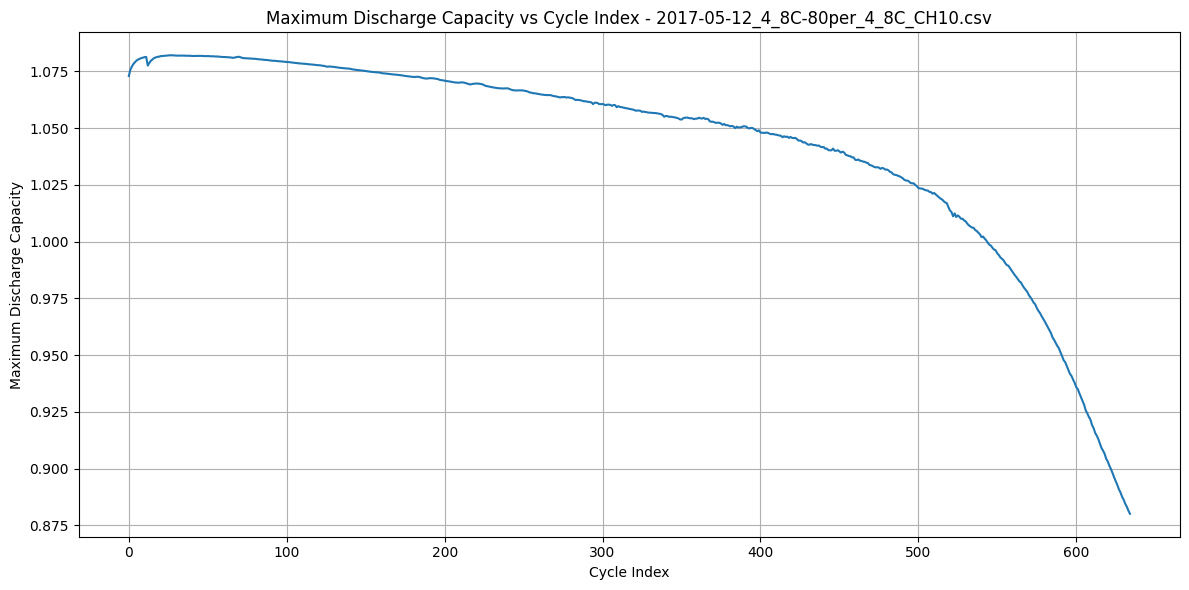

2017-05-12_4_8C-80per_4_8C_CH9.csv
7


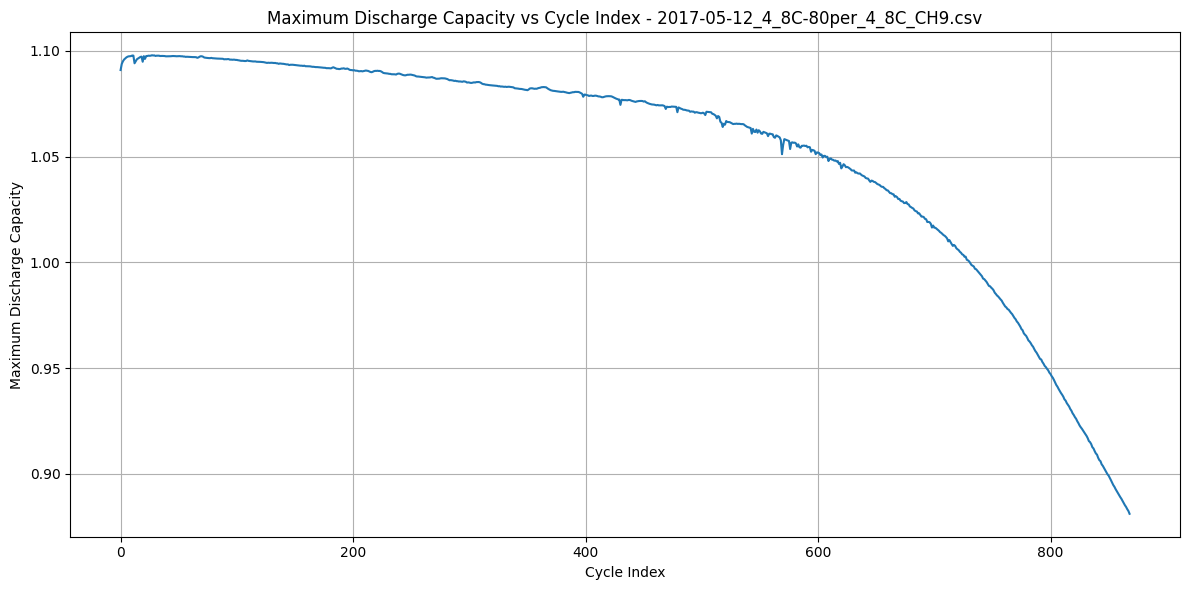

2017-05-12_5_4C-80per_5_4C_CH11.csv
8


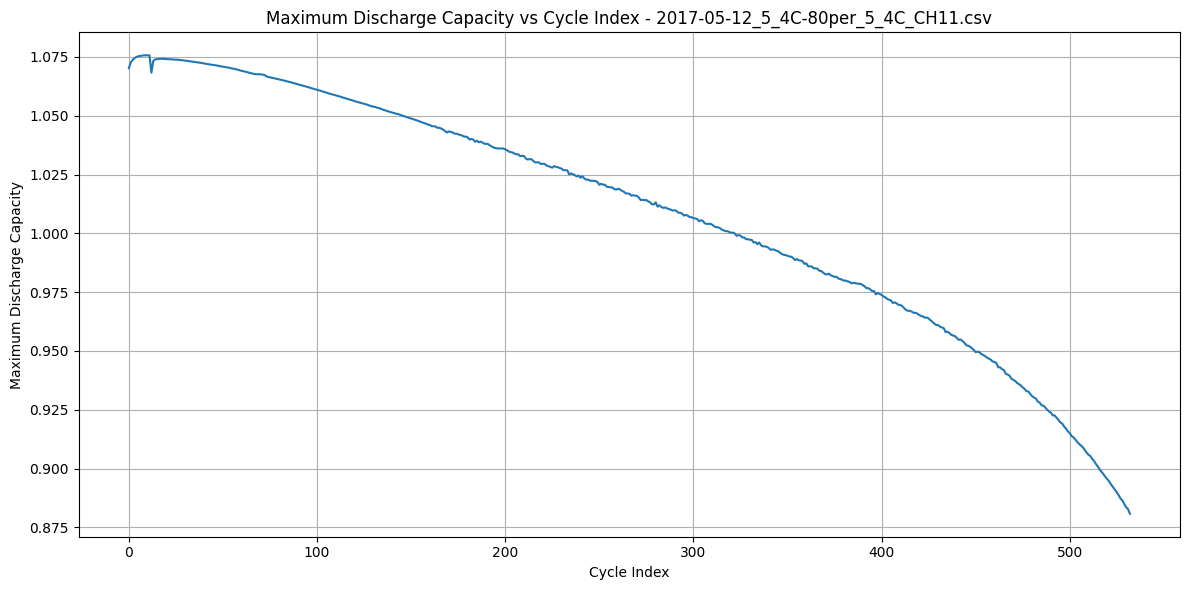

2017-05-12_5_4C-80per_5_4C_CH12.csv
9


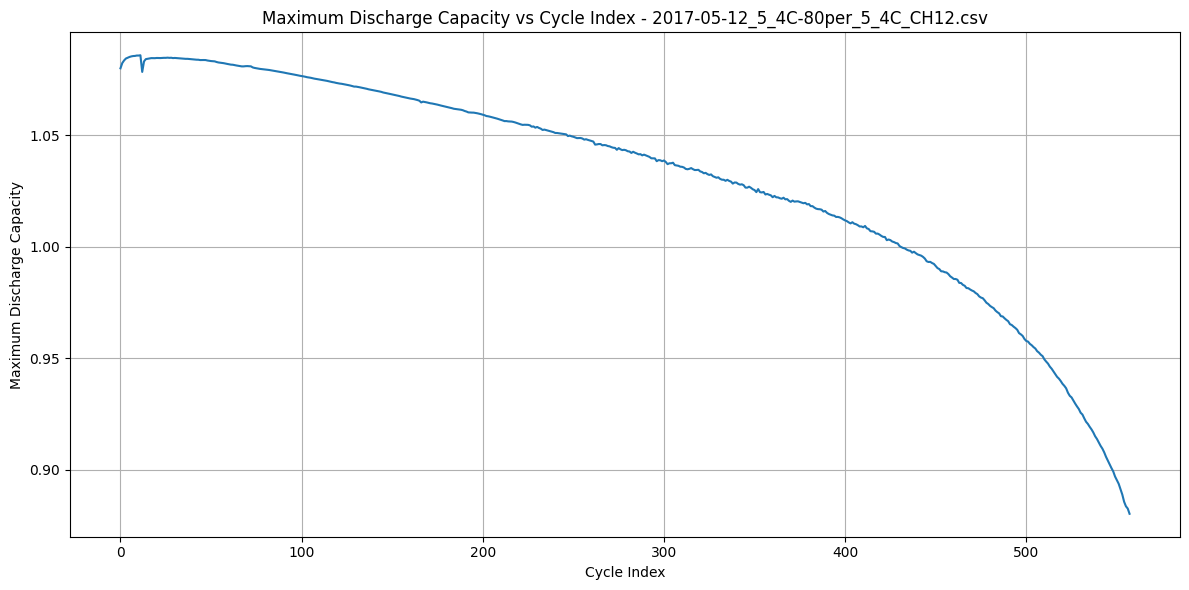

2017-06-30_4_8C-80per_4_8C_CH4.csv
10


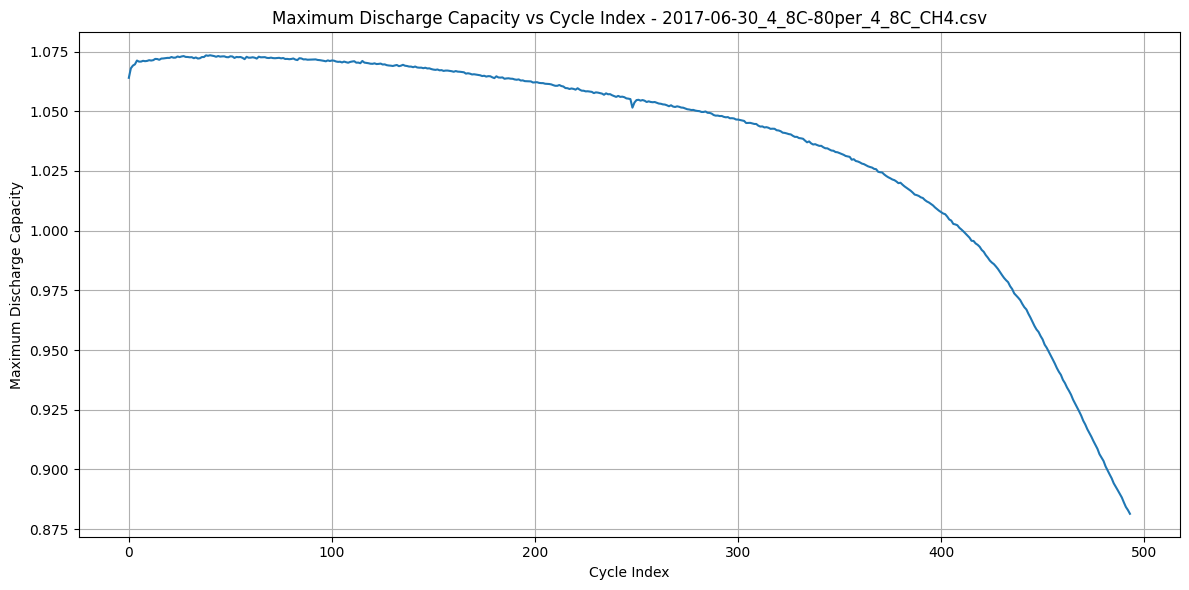

2017-06-30_4_8C-80per_4_8C_CH7.csv
11


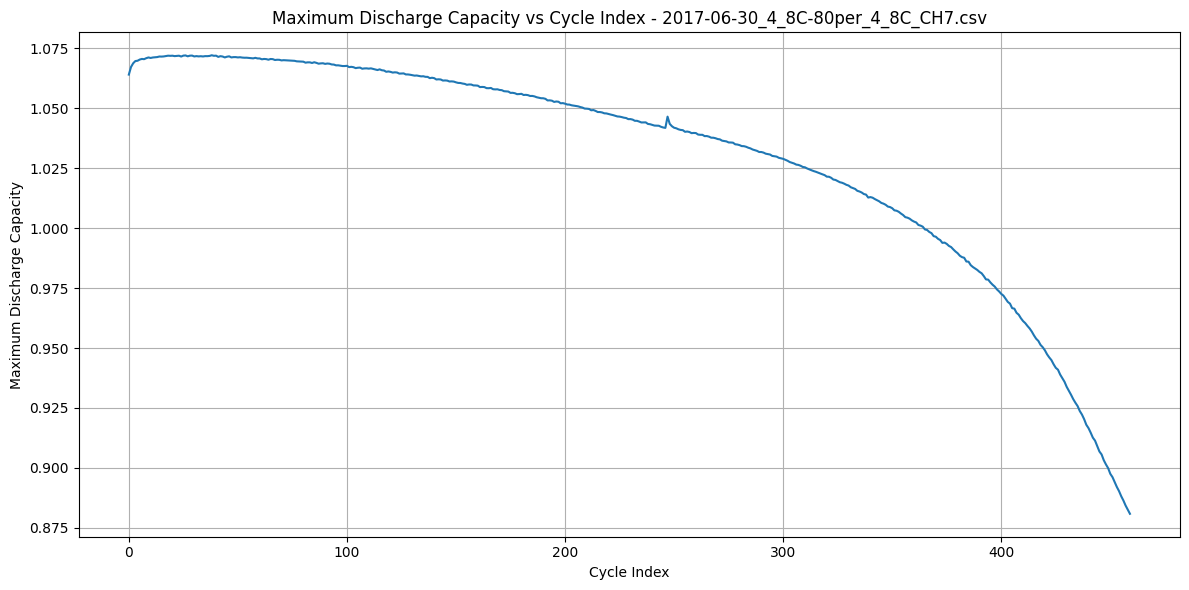

2017-06-30_4_8C-80per_4_8C_CH8.csv
12


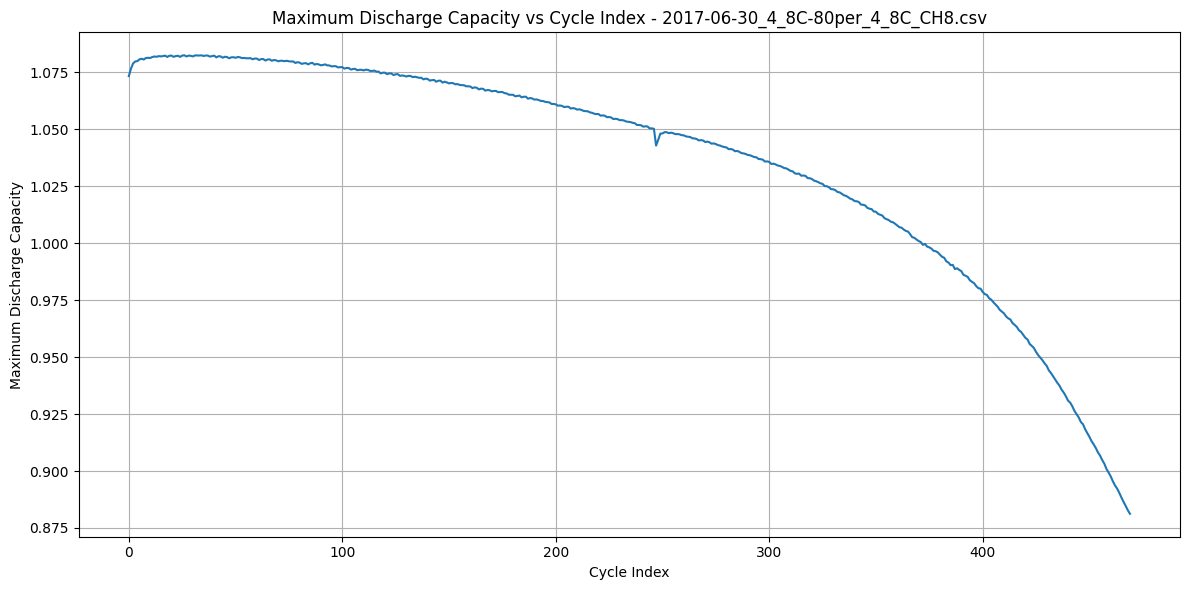

2018-04-12_4_8C_80per_4_8C_newstructure_CH1.csv
13


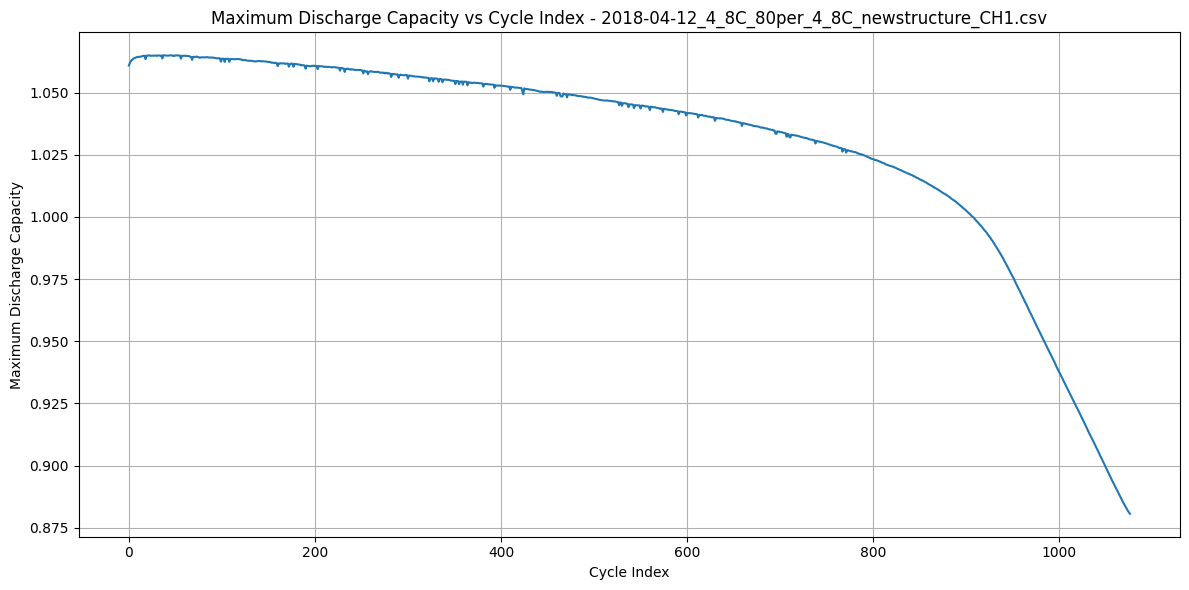

2018-04-12_4_8C_80per_4_8C_newstructure_CH17.csv
14


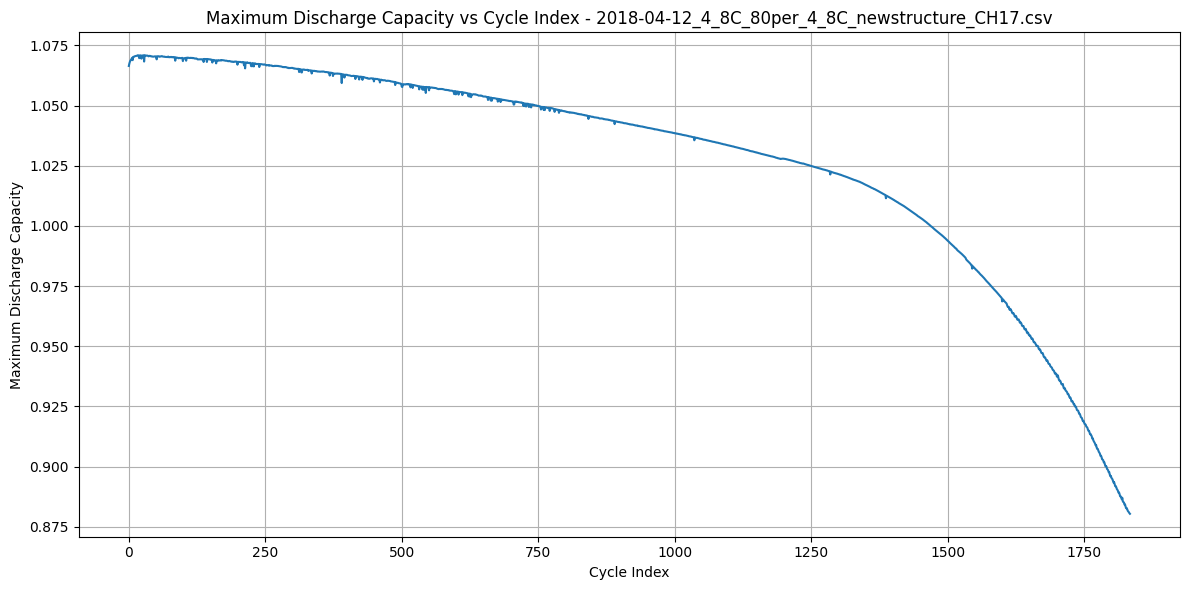

2018-04-12_4_8C_80per_4_8C_newstructure_CH25.csv
15


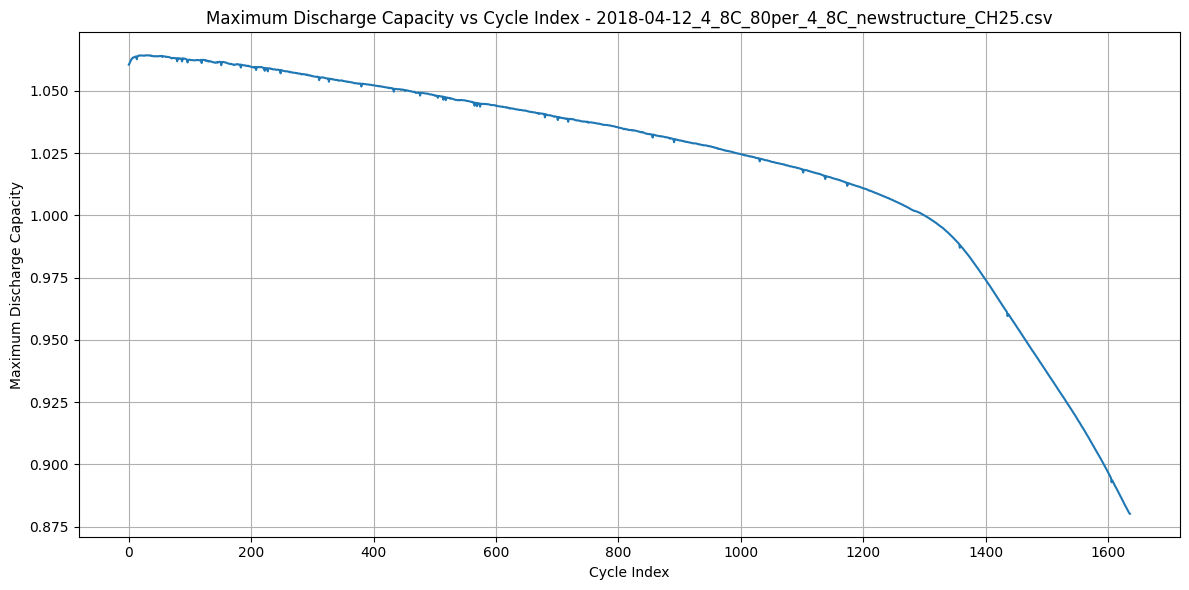

2018-04-12_4_8C_80per_4_8C_newstructure_CH9.csv
16


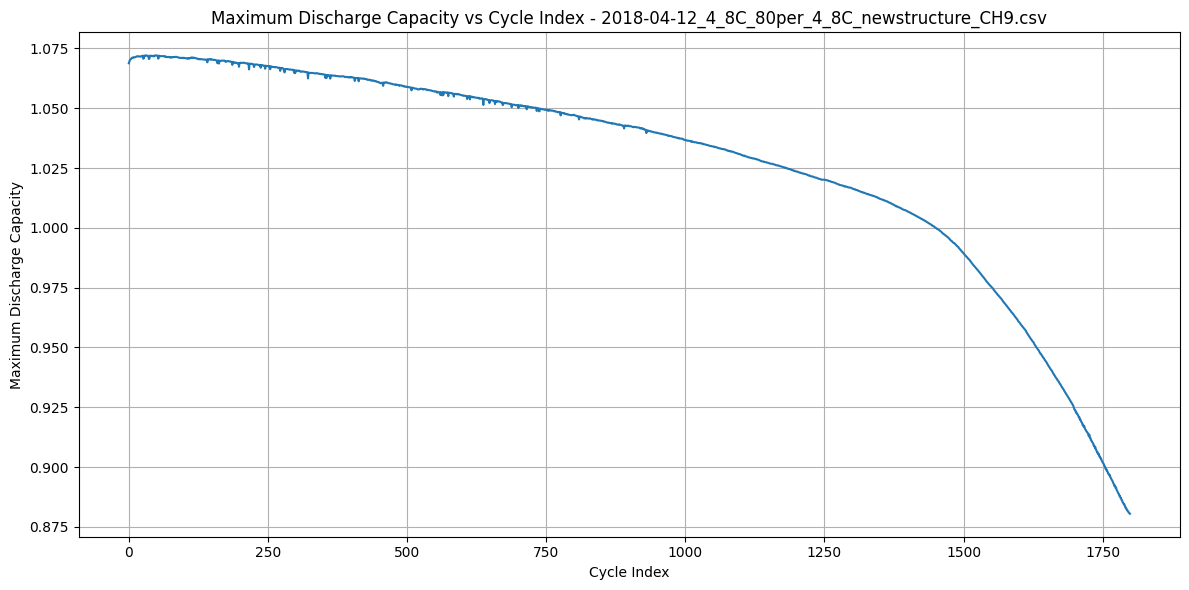

In [46]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Répertoire contenant les fichiers CSV
directory = r'C:\Users\pc\Desktop\data\all batchs' 
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
i=0
# Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)

    # Calculer le maximum de Discharge Capacity par Cycle_Index
    max_discharge_capacity = df.groupby('Cycle_Index')['Discharge_Capacity'].max()

    # Filtrer les cycles où le max Discharge Capacity est > 1.1 ou < 0.88
    filtered_cycles = max_discharge_capacity[(max_discharge_capacity > 1.1) | (max_discharge_capacity < 0.88)]

    # Afficher les numéros de cycle correspondant
    if not filtered_cycles.empty:
        print(f"Fichier : {csv_file}")
        print("Cycle_Index où le max Discharge Capacity est > 1.1 ou < 0.88 :")
        print(filtered_cycles)
        print("\n")
    print(csv_file)
    print(i)
    i+=1
    # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
    plt.figure(figsize=(12, 6)) 
    plt.plot(max_discharge_capacity.index, max_discharge_capacity.values, label=csv_file)
    plt.xlabel('Cycle Index')
    plt.ylabel('Maximum Discharge Capacity')
    plt.title(f'Maximum Discharge Capacity vs Cycle Index - {csv_file}')
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    
    # Afficher le graphique
    plt.show()


### Other columns

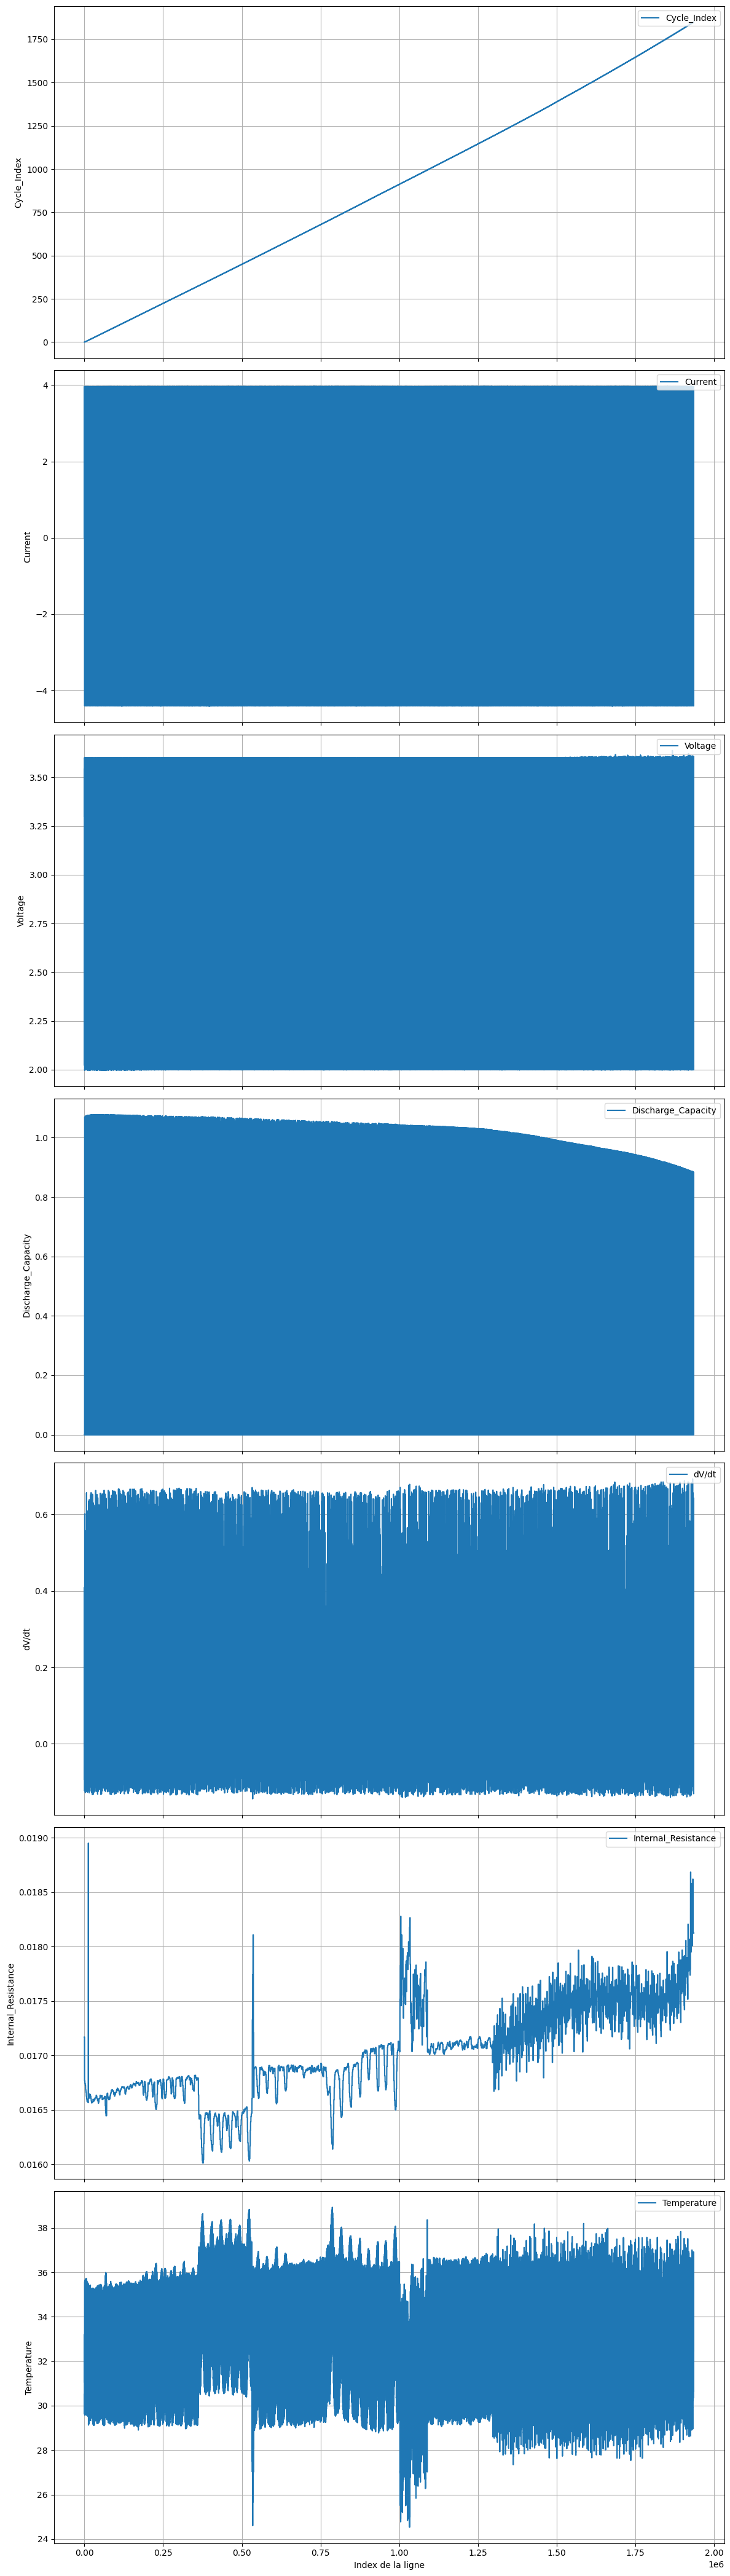

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

directory = r'C:\\Users\\pc\\Desktop\\data\\all batchs\\2017-05-12_3_6C-80per_3_6C_CH1.csv' 

# Lire le fichier CSV
df = pd.read_csv(directory)

# Créer une figure avec un nombre dynamique de sous-graphiques en fonction du nombre de colonnes
num_columns = len(df.columns)
fig, axes = plt.subplots(num_columns, 1, figsize=(12, 6 * num_columns), sharex=True)

# Itérer à travers chaque colonne et créer un sous-graphique pour chaque colonne
for i, column in enumerate(df.columns):
    axes[i].plot(df.index, df[column], label=column)
    axes[i].set_ylabel(column)
    axes[i].legend(loc='upper right')
    axes[i].grid(True)

# Ajouter un label pour l'axe x uniquement au dernier sous-graphique
axes[-1].set_xlabel('Index de la ligne')

# Ajuster le layout pour que tout soit visible
plt.tight_layout()

# Afficher le graphique
plt.show()


## Internal resistance vs index

2017-05-12_3_6C-80per_3_6C_CH2.csv


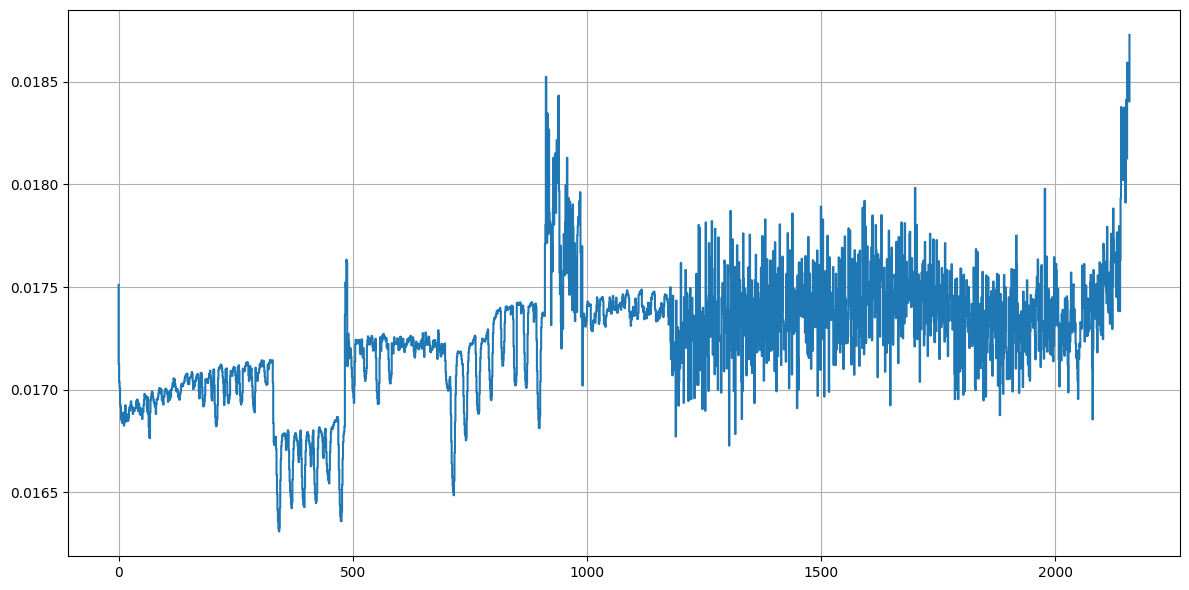

2017-05-12_3_6C-80per_3_6C_CH3.csv


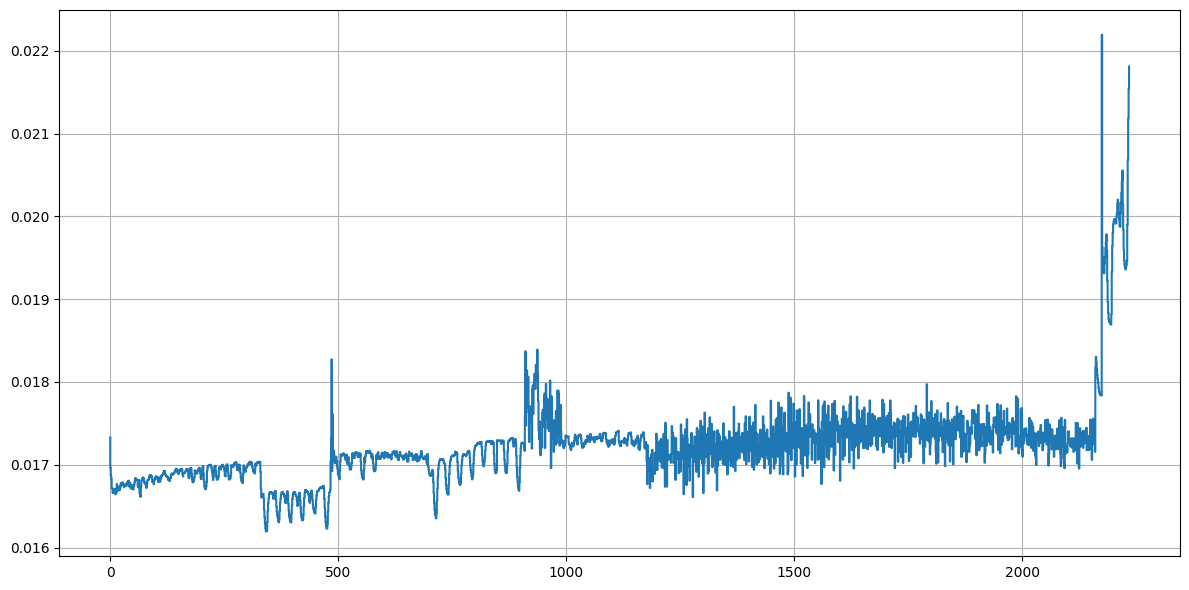

2017-05-12_4C-80per_4C_CH5.csv


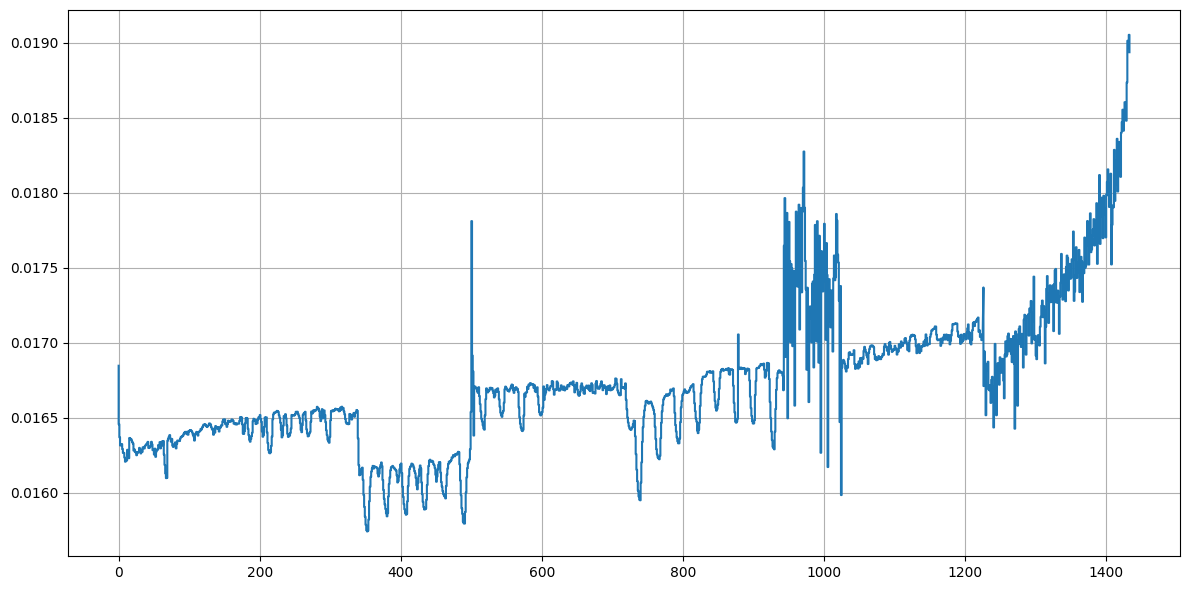

2017-05-12_4C-80per_4C_CH6.csv


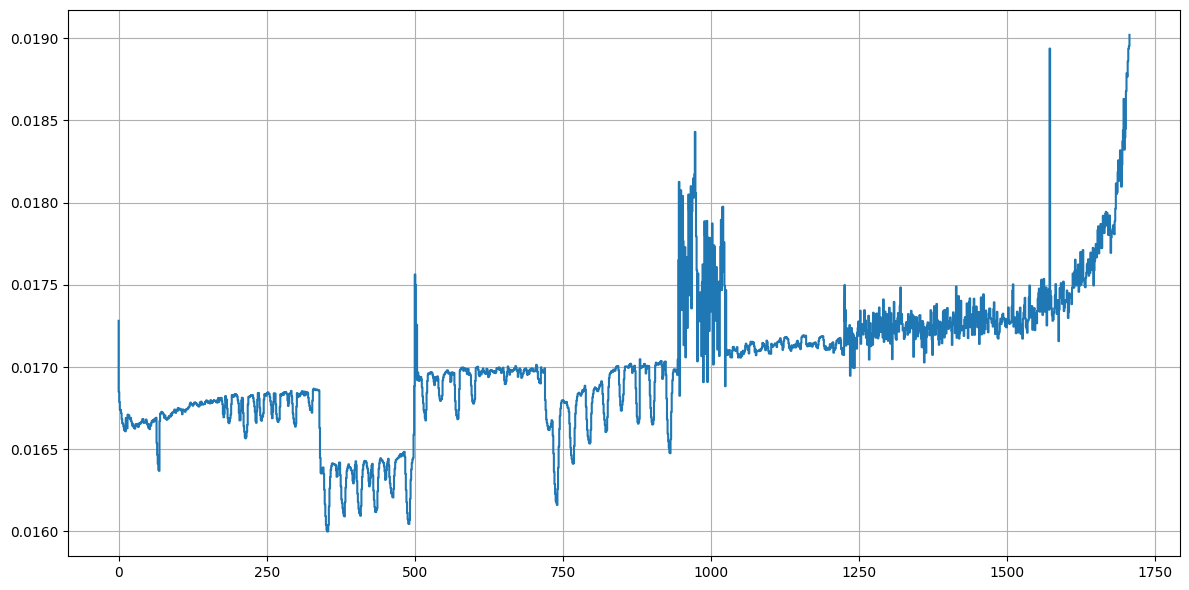

2017-05-12_4_4C-80per_4_4C_CH7.csv


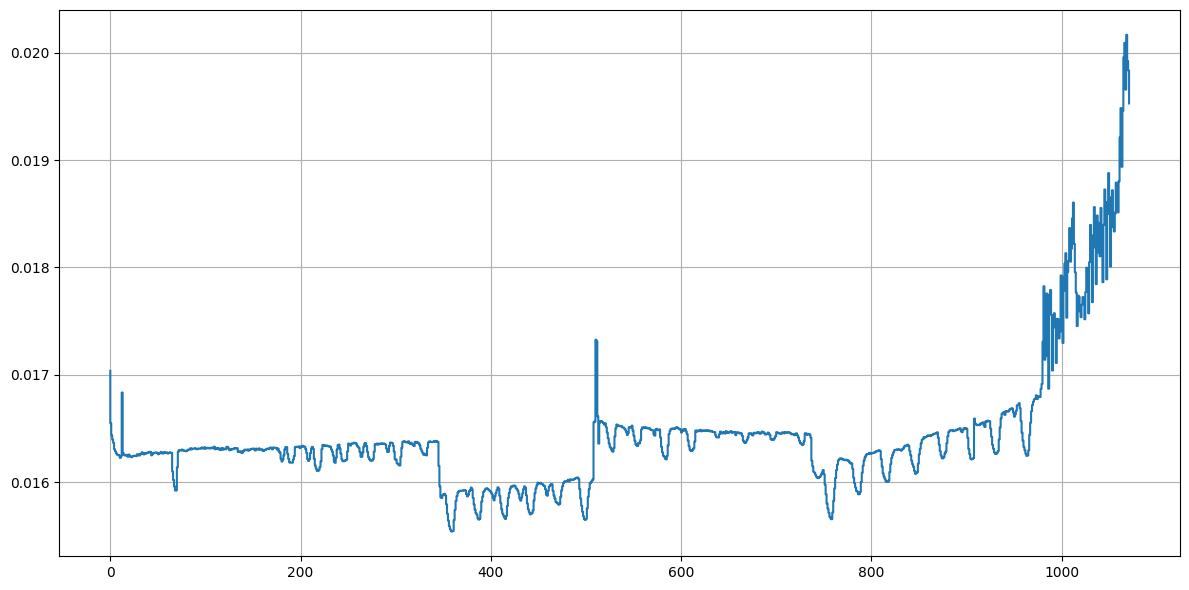

2017-05-12_4_8C-80per_4_8C_CH10.csv


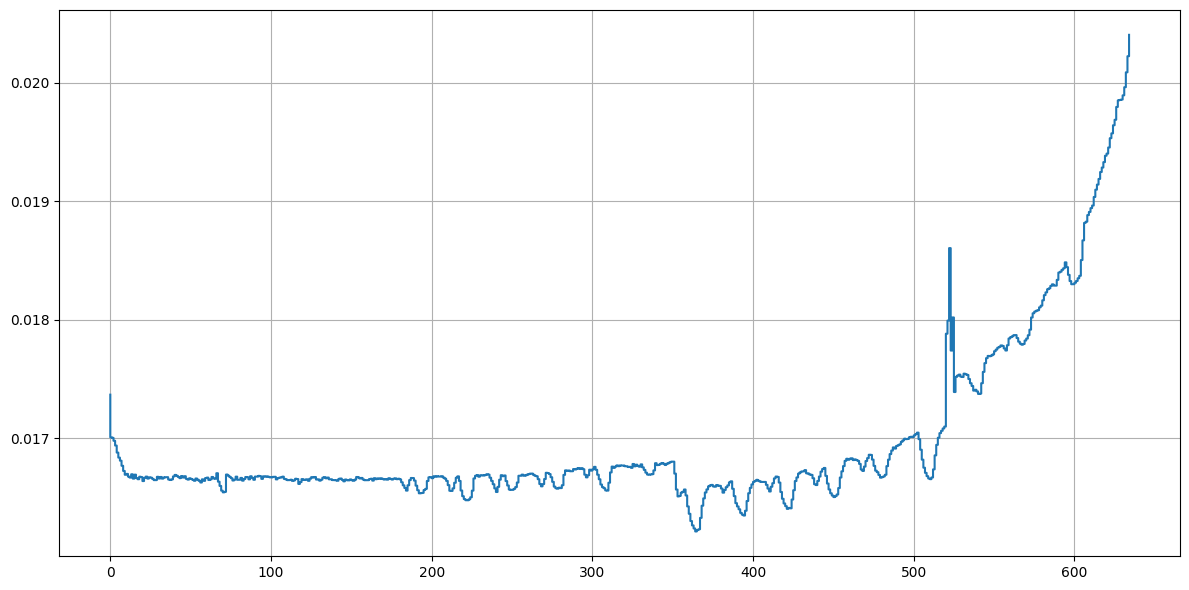

2017-05-12_4_8C-80per_4_8C_CH9.csv


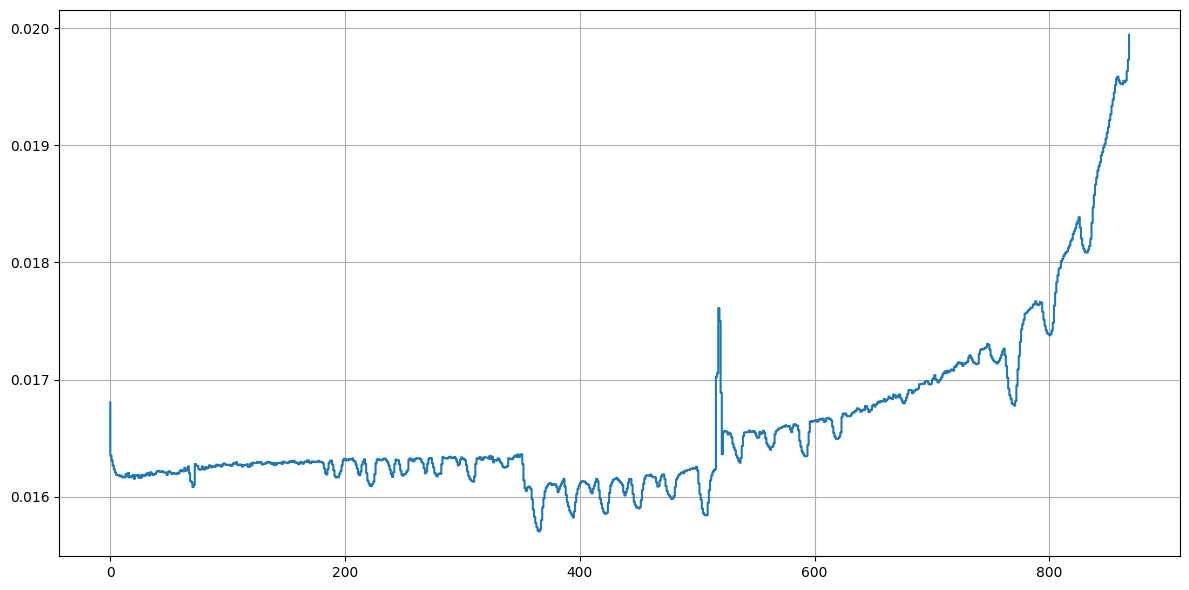

2017-05-12_5_4C-80per_5_4C_CH11.csv


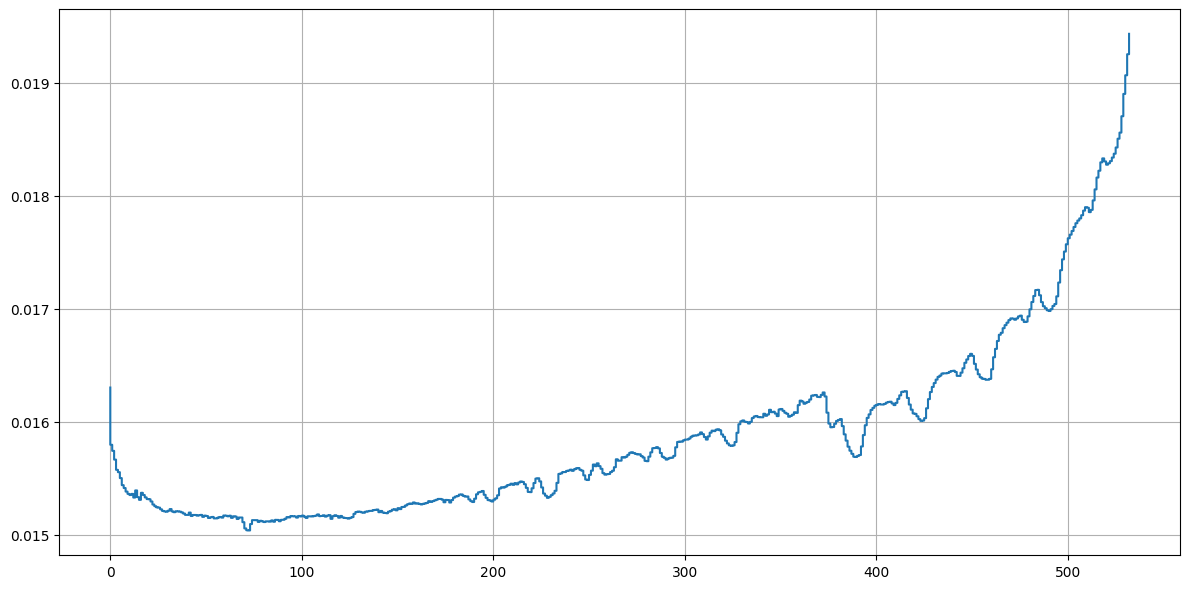

2017-05-12_5_4C-80per_5_4C_CH12.csv


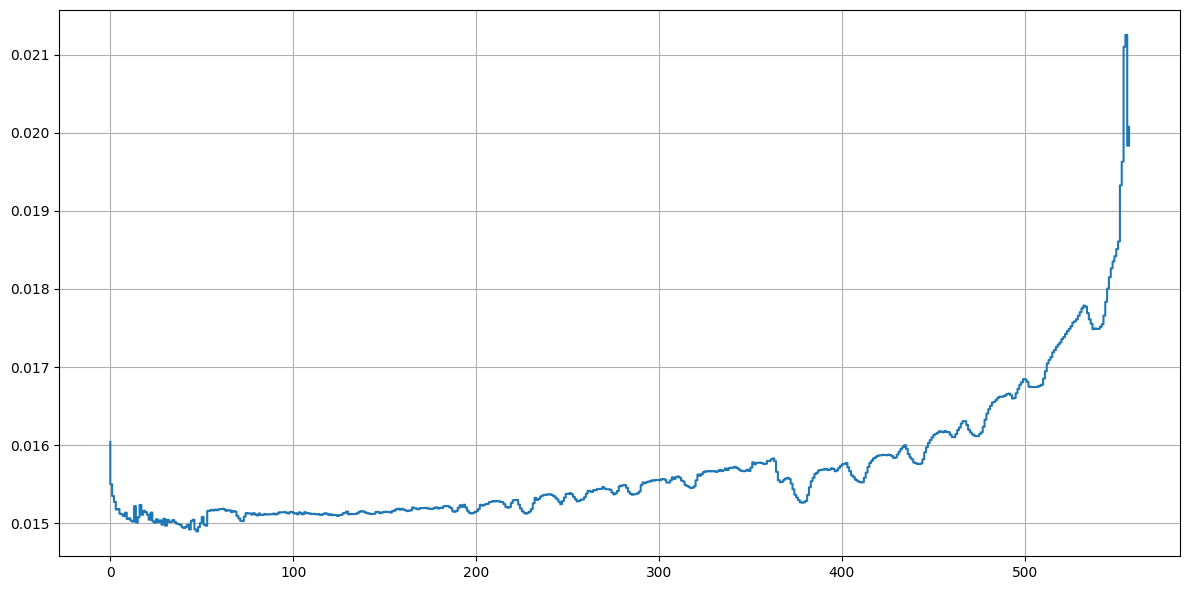

2017-06-30_4_8C-80per_4_8C_CH4.csv


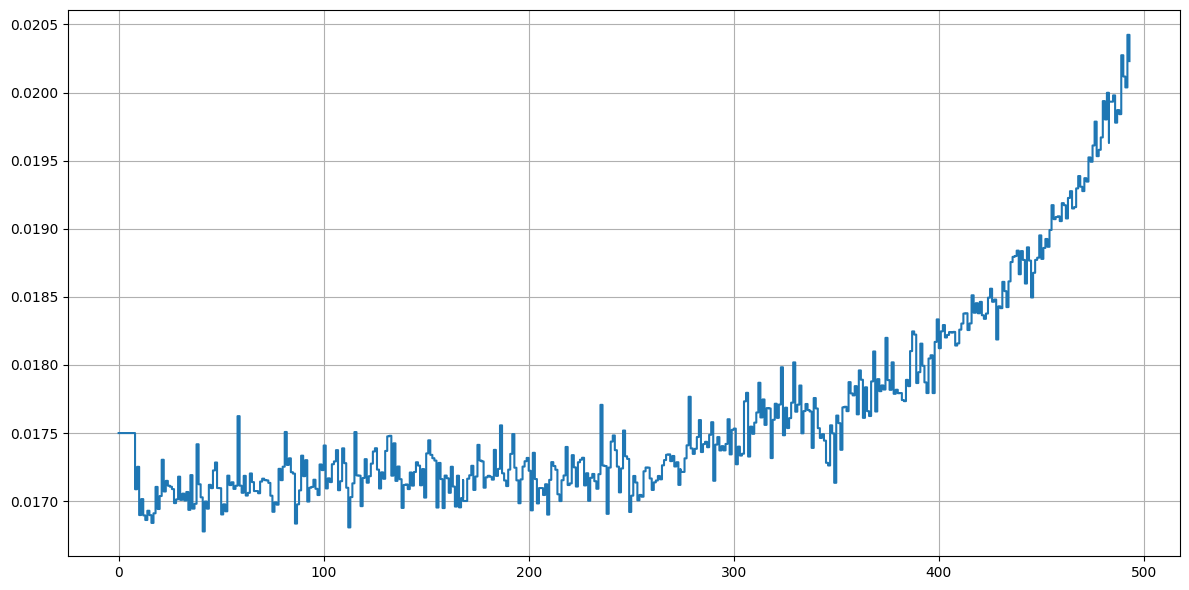

2017-06-30_4_8C-80per_4_8C_CH7.csv


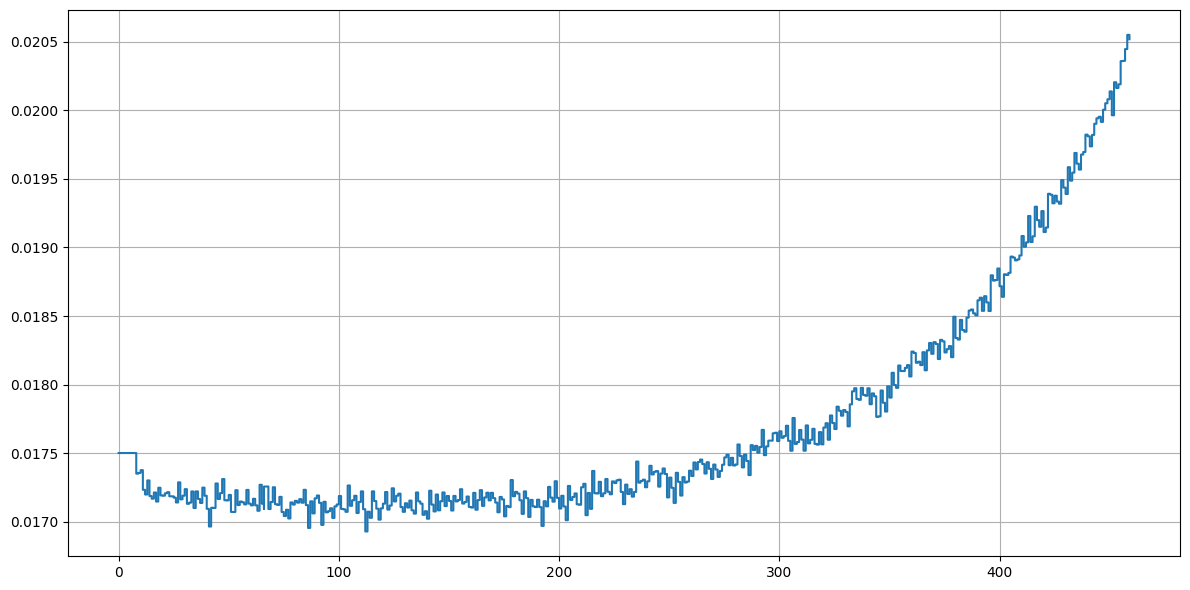

2017-06-30_4_8C-80per_4_8C_CH8.csv


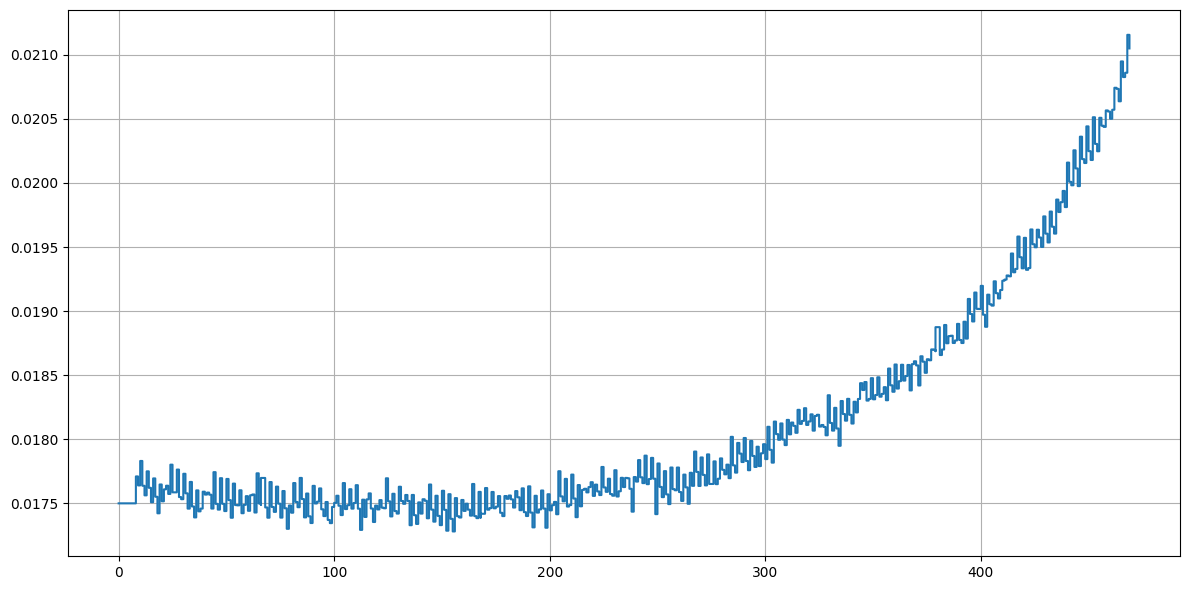

2018-04-12_4_8C_80per_4_8C_newstructure_CH1.csv


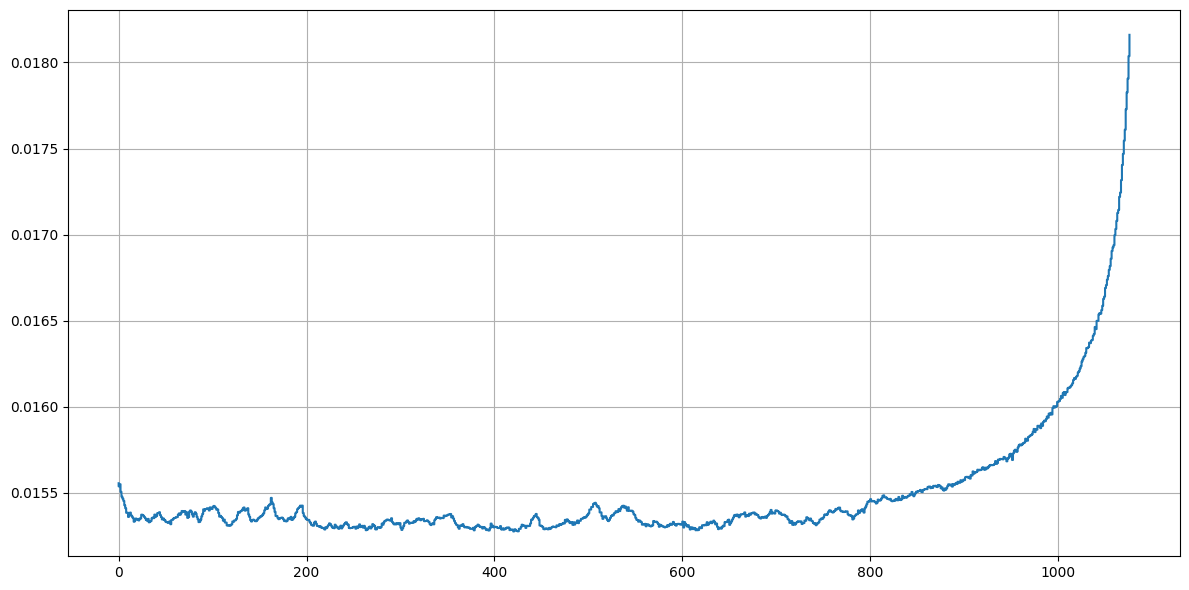

2018-04-12_4_8C_80per_4_8C_newstructure_CH17.csv


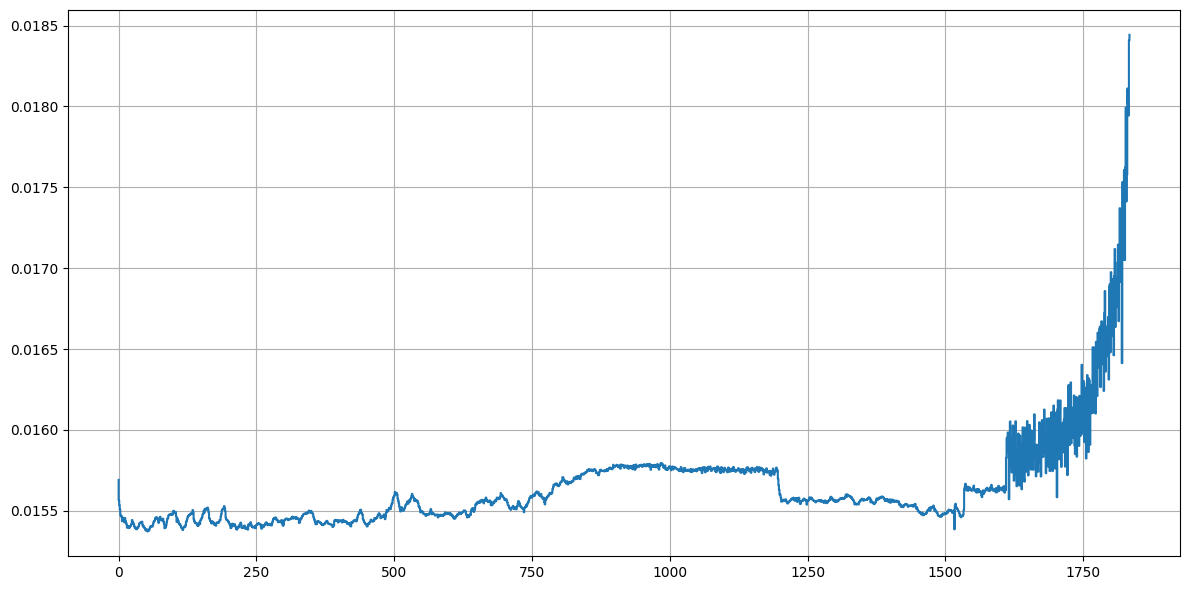

2018-04-12_4_8C_80per_4_8C_newstructure_CH25.csv


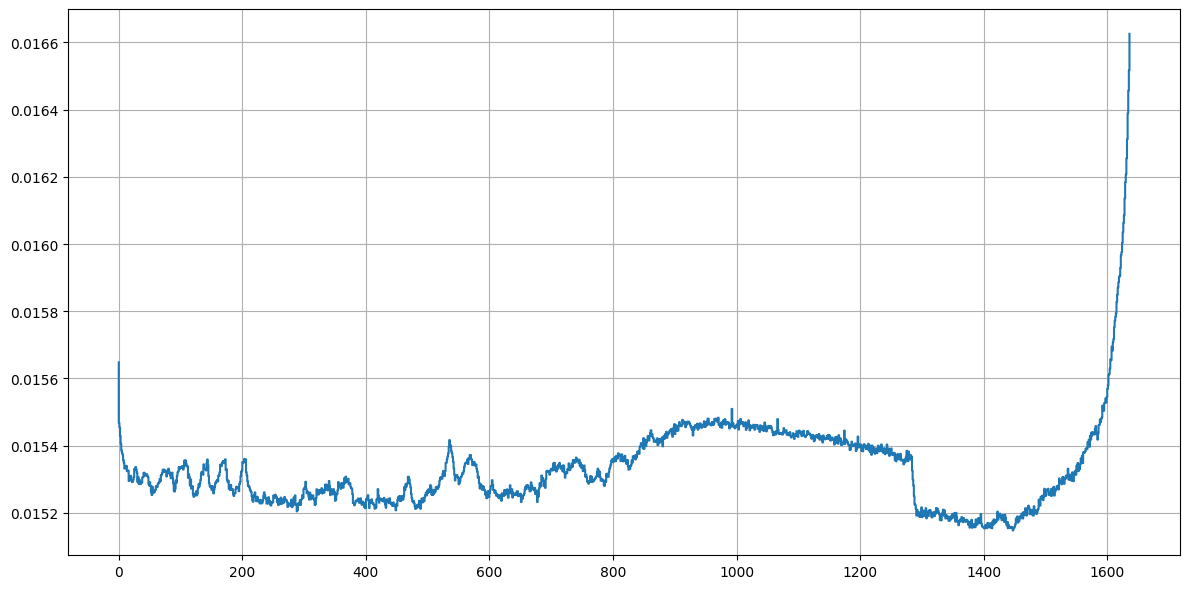

2018-04-12_4_8C_80per_4_8C_newstructure_CH9.csv


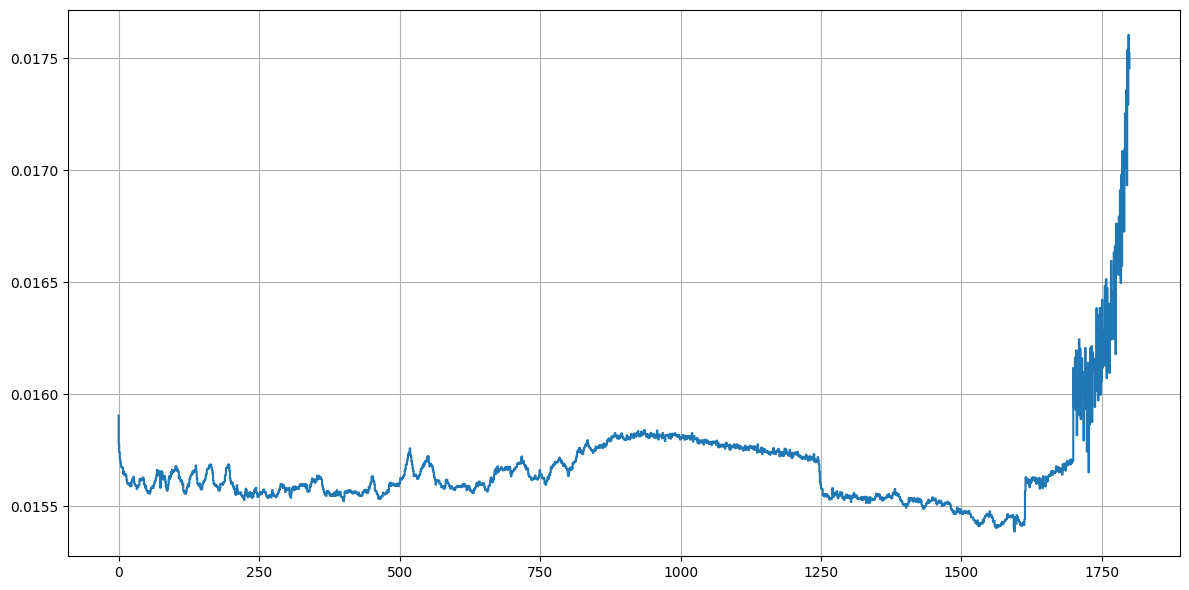

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Répertoire contenant les fichiers CSV
directory = r'C:\Users\pc\Desktop\data\all batchs' 
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]

# Lire et tracer le maximum de Discharge Capacity pour chaque fichier CSV
for csv_file in csv_files:
    file_path = os.path.join(directory, csv_file)
    df = pd.read_csv(file_path)
    print(csv_file)
    
    # Tracer le maximum de Discharge Capacity pour chaque Cycle_Index
    plt.figure(figsize=(12, 6)) 
    plt.plot( df['Cycle_Index'], df['Internal_Resistance'], label=csv_file)
    #plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placer la légende à l'extérieur du graphique
    plt.grid(True)
    plt.tight_layout()  # Ajuster le layout pour que tout soit visible
    
    # Afficher le graphique
    plt.show()
